# Tarefa

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

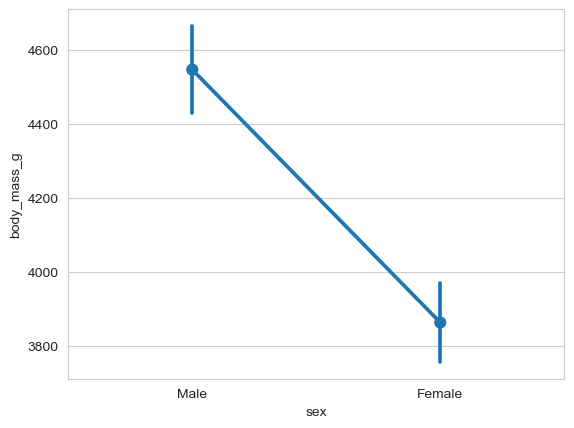

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [8]:
# Remover linhas com valores ausentes para a análise
cleaned_data = pg.dropna(subset=['body_mass_g', 'sex'])

# Dividir os dados em grupos de machos e fêmeas
male_weights = cleaned_data[cleaned_data['sex'] == 'Male']['body_mass_g']
female_weights = cleaned_data[cleaned_data['sex'] == 'Female']['body_mass_g']

# Realiza um teste t para comparar as médias dos dois grupos
t_stat, p_value = stats.ttest_ind(male_weights, female_weights)

# Resultados do teste
t_stat, p_value, p_value < 0.05  # Verificar se o p-valor é menor que 0.05 (5% de significância)


(8.541720337994516, 4.897246751596224e-16, True)

- Como o p-valor é significativamente menor do que o limiar de significância de 0.05 (5%), rejeitamos a hipótese nula de que não há diferença significativa nos pesos entre machos e fêmeas na população de pinguins. Isso sugere que a diferença observada na amostra pode, de fato, ser extrapolada para a população de pinguins como um todo.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

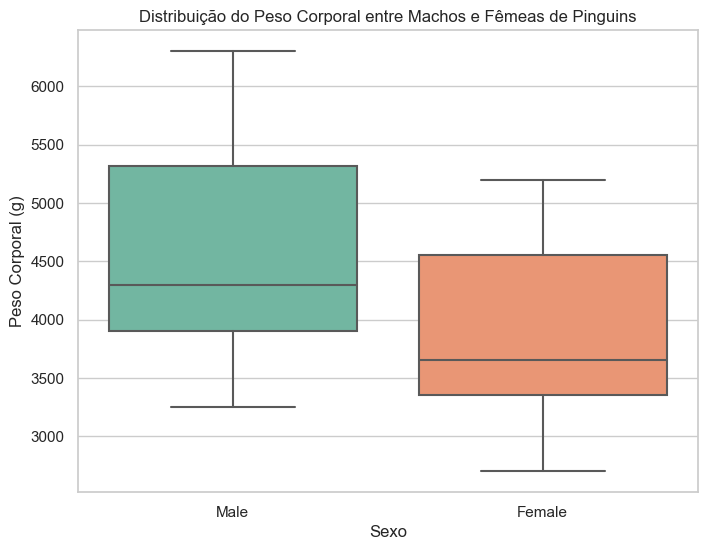

In [10]:
# Configurações do estilo do gráfico
sns.set(style="whitegrid")

# Criar um gráfico de caixa para comparar os pesos entre machos e fêmeas
plt.figure(figsize=(8, 6))
sns.boxplot(x="sex", y="body_mass_g", data=cleaned_data, palette="Set2")

# Títulos e rótulos
plt.title('Distribuição do Peso Corporal entre Machos e Fêmeas de Pinguins')
plt.xlabel('Sexo')
plt.ylabel('Peso Corporal (g)')

plt.show()


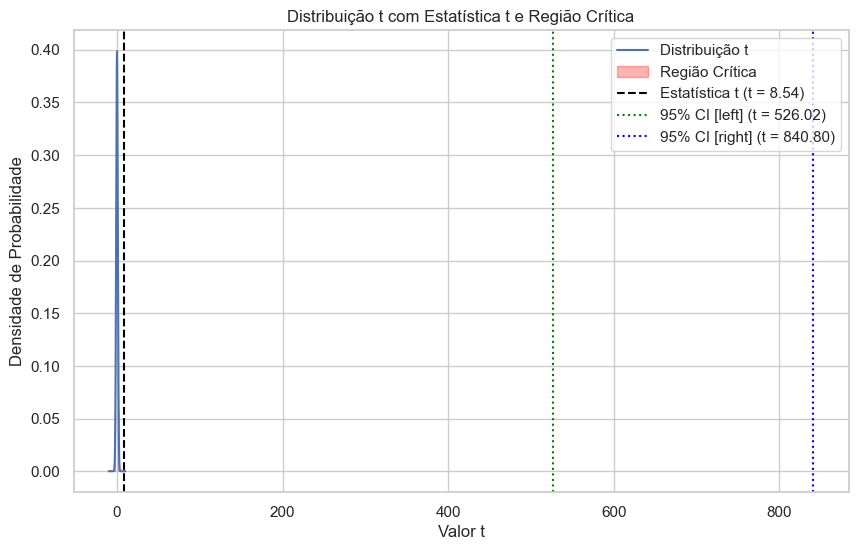

In [12]:
# Calculando o intervalo de confiança para a diferença de médias
# Graus de liberdade combinados
df = len(male_weights) + len(female_weights) - 2

# Desvio padrão combinado
s = np.sqrt(((len(male_weights) - 1) * np.var(male_weights, ddof=1) + 
             (len(female_weights) - 1) * np.var(female_weights, ddof=1)) / df)

# Erro padrão da diferença de médias
se = s * np.sqrt(1/len(male_weights) + 1/len(female_weights))

# Intervalo de confiança de 95%
ci = stats.t.interval(0.95, df, loc=np.mean(male_weights) - np.mean(female_weights), scale=se)

# Valor crítico para um teste bilateral
t_crit = stats.t.ppf(1 - 0.025, df)

# Plotando a distribuição t e as regiões críticas
x = np.linspace(-10, 10, 1000)
y = stats.t.pdf(x, df)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribuição t")
plt.fill_between(x, y, where=(x >= t_crit) | (x <= -t_crit), color="red", alpha=0.3, label="Região Crítica")
plt.axvline(t_stat, color='black', linestyle='dashed', linewidth=1.5, label=f'Estatística t (t = {t_stat:.2f})')
plt.axvline(ci[0], color='green', linestyle='dotted', linewidth=1.5, label=f'95% CI [left] (t = {ci[0]:.2f})')
plt.axvline(ci[1], color='blue', linestyle='dotted', linewidth=1.5, label=f'95% CI [right] (t = {ci[1]:.2f})')

plt.legend()
plt.title("Distribuição t com Estatística t e Região Crítica")
plt.xlabel("Valor t")
plt.ylabel("Densidade de Probabilidade")
plt.show()


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [15]:
# Separar os dados por espécie
species_list = pg['species'].unique()

# Dicionário para armazenar os p-valores para cada espécie
p_values_species = {}

for species in species_list:
    # Dados específicos da espécie
    species_data = cleaned_data[cleaned_data['species'] == species]

    # Separar os dados em grupos de machos e fêmeas
    male_weights_species = species_data[species_data['sex'] == 'Male']['body_mass_g']
    female_weights_species = species_data[species_data['sex'] == 'Female']['body_mass_g']

    # Realizar um teste t para cada espécie
    _, p_value_species = stats.ttest_ind(male_weights_species, female_weights_species)

    # Armazenar o p-valor para a espécie
    p_values_species[species] = p_value_species

p_values_species


{'Adelie': 2.2206436307866114e-26,
 'Chinstrap': 2.043956471470739e-06,
 'Gentoo': 2.133687602018886e-28}

Os p-valores associados ao teste T para a diferença de peso entre machos e fêmeas, separados por espécie de pinguim, são os seguintes:

- **Adelie**: \( p \approx 2.22 \times 10^{-26} \)
- **Chinstrap**: \( p \approx 2.04 \times 10^{-6} \)
- **Gentoo**: \( p \approx 2.13 \times 10^{-28} \)

Em todas as três espécies, os p-valores são extremamente baixos, indicando que as diferenças de peso entre machos e fêmeas são estatisticamente significativas para cada uma dessas espécies de pinguins. Isso sugere que a diferença de peso entre os sexos é uma característica consistente em todas essas espécies.